In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Study Cohort

In [6]:
# Import Data
study_cohort = pd.read_excel('VAP_DeID_2022-01-12 from CTSI.xlsx', sheet_name='Study_Cohort_DeID')
study_cohort.head(3)

,seq,Encounter_Number,SubjectID,Race,Ethnicity,Sex,Discharge_Status,Length_of_Stay (days),Age_at_Admission,Unnamed: 9
0,1,3415,10001,White or Caucasian,Not Hispanic or Latino,F,Home or Self Care,13.1,33.2,NaN
1,2,2584,10002,White or Caucasian,Not Hispanic or Latino,F,Patient Expired,10.1,80,NaN
2,3,4498,10003,Unknown,Hispanic or Latino,M,Home or Self Care,8.3,74.2,NaN


In [7]:
print('Number of Repeated Subject Instances: ', 
      study_cohort['Encounter_Number'].count() - study_cohort['SubjectID'].drop_duplicates().count())

Number of Repeated Subject Instances:  458


In [8]:
study_cohort['Race'].unique()

array([' White or Caucasian', ' Unknown', ' Black or African American',
       ' Black or African American ~ Other',
       ' Black or African American ~ Unknown', ' Other',
       ' Asian ~ Unknown', ' Asian', ' Asian ~ Asian Indian',
       ' Other ~ White or Caucasian', ' Asian ~ Filipino',
       ' Patient Refused ~ White or Caucasian',
       ' Unknown ~ White or Caucasian', ' Patient Refused', nan,
       ' Nepalese ~ Other', ' Pakistani', ' Other ~ Unknown',
       ' Other Pacific Islander',
       ' Black or African American ~ White or Caucasian', ' Asian Indian',
       ' Laotian ~ Other', ' Asian ~ Vietnamese',
       ' American Indian or Alaskan Native',
       ' American Indian or Alaskan Native ~ Black or African American',
       ' Guamanian', ' Asian ~ Chinese', ' Asian ~ Other', ' Indonesian',
       ' Palauan ~ White or Caucasian', ' Nepalese',
       ' Bangladeshi ~ White or Caucasian',
       ' Black or African American ~ Other ~ White or Caucasian',
       ' America

In [9]:
race_dict = {' White or Caucasian' : 'White',
             ' Unknown': np.nan,
             ' Black or African American': 'Black',
             ' Black or African American ~ Other': 'Black',
             ' Black or African American ~ Unknown': 'Black',
             ' Asian ~ Unknown': 'Asian',
             ' Asian': 'Asian',
#              ' Asian ~ Asian Indian': '',
             ' Other ~ White or Caucasian': 'White',
             ' Asian ~ Filipino': 'Asian',
             ' Patient Refused ~ White or Caucasian': 'White',
             ' Unknown ~ White or Caucasian': 'White',
             ' Patient Refused': np.nan,
             ' Nepalese ~ Other': 'Asian',
#              ' Pakistani': '',
             ' Other ~ Unknown': np.nan,
#              ' Other Pacific Islander': ,
#              ' Black or African American ~ White or Caucasian': '', 
             ' Asian Indian': 'Asian',
#              ' Laotian ~ Other': '', 
             ' Asian ~ Vietnamese': 'Asian',
             ' American Indian or Alaskan Native': 'White',
#              ' American Indian or Alaskan Native ~ Black or African American': '',
#              ' Guamanian',
             ' Asian ~ Chinese': 'Asian', 
             ' Asian ~ Other': 'Asian',
             ' Indonesian': 'Asian',
             ' Palauan ~ White or Caucasian': 'White',
#              ' Nepalese',
#              ' Bangladeshi ~ White or Caucasian',
#              ' Black or African American ~ Other ~ White or Caucasian',
#              ' American Indian or Alaskan Native ~ Other': 'White',
#              ' American Indian or Alaskan Native ~ White or Caucasian': 'White',
#              ' Black or African American ~ Other ~ Unknown',
#              ' Black or African American ~ Native Hawaiian',
             ' Asian Indian ~ Unknown': 'Asian',
#              ' Black or African American ~ Indonesian ~ Other',
#              ' Asian Indian ~ White or Caucasian',
#              ' White or Caucasian ~ Yapese', 
#              ' Asian ~ White or Caucasian',
             ' Bhutanese ~ Other': 'Asian'
            }

In [10]:
study_cohort['Race'] = study_cohort['Race'].map(race_dict)
study_cohort['Race'].unique()

array(['White', nan, 'Black', 'Asian'], dtype=object)

In [11]:
study_cohort['Ethnicity'].unique()

array([' Not Hispanic or Latino', ' Hispanic or Latino',
       ' Not Hispanic or Latino ~ Unknown', ' Unknown',
       ' Not Hispanic or Latino ~ Patient Refused', ' Puerto Rican',
       ' Patient Refused', ' Mexican American Indian',
       ' Patient Refused ~ Unknown',
       ' Hispanic or Latino ~ Not Hispanic or Latino',
       ' Not Hispanic or Latino ~ Uruguayan',
       ' Hispanic or Latino ~ Unknown', ' Spaniard ~ Unknown',
       ' Hispanic or Latino ~ Puerto Rican', ' Peruvian',
       ' Guatemalan ~ Honduran ~ Puerto Rican ~ Spaniard',
       ' Central American', ' Spaniard', ' Puerto Rican ~ Unknown',
       ' Dominican ~ Puerto Rican', ' Mexican American', ' Guatemalan',
       ' South American Indian', ' Central American Indian'], dtype=object)

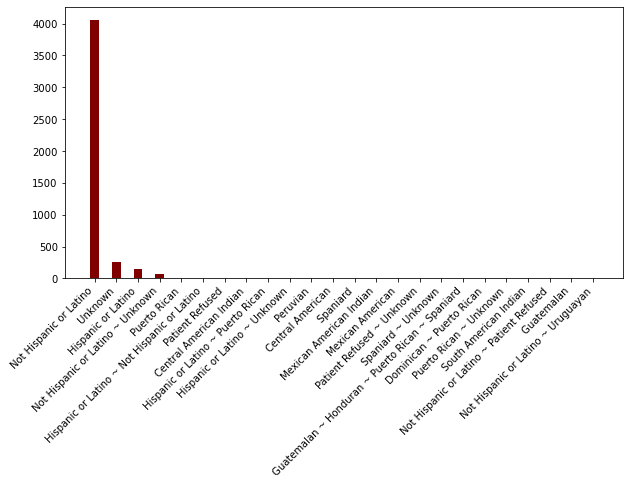

In [25]:
data = study_cohort['Ethnicity'].value_counts().to_dict()


courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
ethnicity_dict = {
    ' Not Hispanic or Latino': 'Not Hispanic', 
    ' Hispanic or Latino': 'Hispanic',
    ' Not Hispanic or Latino ~ Unknown': 'Not Hispanic', 
    ' Unknown': np.nan,
    ' Not Hispanic or Latino ~ Patient Refused': 'Not Hispanic', 
    ' Puerto Rican': 'Hispanic',
    ' Patient Refused': np.nan, 
    ' Mexican American Indian': 'Hispanic',
    ' Patient Refused ~ Unknown': np.nan,
    ' Hispanic or Latino ~ Not Hispanic or Latino': np.nan,
    ' Not Hispanic or Latino ~ Uruguayan': 'Not Hispanic',
    ' Hispanic or Latino ~ Unknown': 'Hispanic', 
#     ' Spaniard ~ Unknown': ,
    ' Hispanic or Latino ~ Puerto Rican': 'Hispanic', 
#     ' Peruvian',
    ' Guatemalan ~ Honduran ~ Puerto Rican ~ Spaniard': 'Hispanic',
    ' Central American': 'Hispanic', 
#     ' Spaniard', 
    ' Puerto Rican ~ Unknown': 'Hispanic',
    ' Dominican ~ Puerto Rican': 'Hispanic', 
    ' Mexican American': 'Hispanic',
    ' Guatemalan': 'Hispanic',
    ' South American Indian': 'Hispanic', 
    ' Central American Indian': 'Hispanic'
}

In [9]:
study_cohort['Ethnicity'] = study_cohort['Ethnicity'].map(ethnicity_dict)
study_cohort['Ethnicity'].unique()

array(['Not Hispanic', 'Hispanic', nan], dtype=object)

In [10]:
study_cohort['Discharge_Status'].unique()

array(['Home or Self Care', 'Patient Expired', 'To Home Health Org Care',
       'To Jail / Law Enforcement Facility', 'To SNF (Skilled Nursing)',
       'To Inpatient Rehab Facility or Unit',
       'Left against medical advice', 'To Hospice/Home Care', nan,
       'To Psychiatric Hospital or Unit', 'To Short Term Acute Care Hosp',
       'To Hospice/Medical Facility', 'To LTC Facility (Long Term Care)',
       'Sent to SMH', 'Sent to HH',
       'To Short Term General Hospital for Inpatient Care with Planned Hospital Readmission',
       'To Inpatient Rehab Facility or Unit with Planned Hospital Readmission',
       'To Other Facility not otherwise defined',
       'To ICF (Intermediate Care)', 'To Federal Hospital',
       "To Designated Cancer Ctr or Children's Hospital with Planned Hospital Readmission",
       'Still Inpatient',
       'To Psychiatric Hospital or Unit with Planned Hospital Readmission'],
      dtype=object)

# Admission

# Insurance

In [11]:
insurance_df = pd.read_excel('VAP_DeID_2022-01-12 from CTSI.xlsx', sheet_name='Insurance_DeID')
insurance_df.head(3)

,seq,Encounter_Number,SubjectID,Insurance
0,1,3415,10001,Commercial
1,2,3415,10001,Out of Area BC/BS
2,3,2584,10002,Government Other


In [12]:
insurance_df['Insurance'].unique()

array(['Commercial', 'Out of Area BC/BS', 'Government Other', 'Medicare',
       'Medicaid', 'Medicare Advantage', 'Medicaid Managed Care',
       'Excellus', 'MVA', 'Aetna', 'MVP', "Worker's Comp",
       'Institutional', nan, 'UNIVERA SENIOR CHOICE MEDICARE',
       'MEDICARE PART A AND B', 'MVP PREMIER INDIVIDUAL', 'EXCELLUS',
       'UNITED HEALTHCARE MEDICAID'], dtype=object)

In [13]:
insurance_dict = {'Commercial': 'Commercial',
#                   'Out of Area BC/BS',  : ''
                  'Government Other': 'Government', 
                  'Medicare': 'Medicare',
                  'Medicaid': 'Medicaid',
                  'Medicare Advantage': 'Medicare',
                  'Medicaid Managed Care': 'Medicaid',
                  'Excellus': 'Excellus', 
                  'MVA': 'MVA',
                  'Aetna': 'Aetna', 
                  'MVP': 'MVP', 
                  "Worker's Comp": "Worker's Comp",
                  'Institutional': 'Institutional', 
                  'UNIVERA SENIOR CHOICE MEDICARE': 'UNIVERA',
                  'MEDICARE PART A AND B': 'Medicare',
                  'MVP PREMIER INDIVIDUAL': 'MVP',
                  'EXCELLUS': 'Excellus',
                  'UNITED HEALTHCARE MEDICAID': 'Medicad'}

In [14]:
insurance_df['Insurance'] = insurance_df['Insurance'].map(insurance_dict)
insurance_df['Insurance'].unique()

array(['Commercial', nan, 'Government', 'Medicare', 'Medicaid',
       'Excellus', 'MVA', 'Aetna', 'MVP', "Worker's Comp",
       'Institutional', 'UNIVERA', 'Medicad'], dtype=object)

# BLIS

In [15]:
blis_assessment_df = pd.read_excel('VAP_DeID_2022-01-12 from CTSI.xlsx', sheet_name='BLIS_ASSESSMENT_DeID')
blis_assessment_df.head(3)

,seq_num,SubjectID,intubation_number,assessment_timepoint,vent_duration (hours),sofa_score,assessment_color
0,14402,10001,1,0,0.48,1,RED
1,11519,10002,1,0,0.48,8,YELLOW
2,14374,10003,1,0,0.27,5,RED


In [16]:
blis_assessment_df['assessment_color'].unique()

array(['RED', 'YELLOW', 'BLUE'], dtype=object)

# COVID Status

In [17]:
covid_df = pd.read_excel('VAP_DeID_2022-01-12 from CTSI.xlsx', sheet_name='COVID_Status_DeID')
covid_df.head(3)

,seq,SubjectID,covid_positive_lab,covid_positive_strong_dx,covid_positive_weak_dx,COVID_POSITIVE_N3C_Phenotype,Unnamed: 6
0,1,13078,No,No,No,No,NaN
1,7,13149,No,No,No,No,NaN
2,8,13695,No,No,No,No,NaN


In [18]:
covid_df[(covid_df['covid_positive_lab'] == 'Yes') &
         ((covid_df['covid_positive_strong_dx'] == 'No') & (covid_df['covid_positive_weak_dx'] == 'No'))]

,seq,SubjectID,covid_positive_lab,covid_positive_strong_dx,covid_positive_weak_dx,COVID_POSITIVE_N3C_Phenotype,Unnamed: 6
2703,17,12076,Yes,No,No,Yes,NaN
2765,178,13959,Yes,No,No,Yes,NaN
2769,188,13571,Yes,No,No,Yes,NaN
2779,209,10502,Yes,No,No,Yes,NaN
3001,872,12790,Yes,No,No,Yes,NaN
3022,918,10915,Yes,No,No,Yes,NaN
3053,1006,10979,Yes,No,No,Yes,NaN
3102,1123,10577,Yes,No,No,Yes,NaN
3123,1186,12652,Yes,No,No,Yes,NaN
3155,1282,13513,Yes,No,No,Yes,NaN


In [19]:
covid_df[(covid_df['covid_positive_lab'] == 'No') &
         ((covid_df['covid_positive_strong_dx'] == 'Yes') & (covid_df['covid_positive_weak_dx'] == 'Yes'))]

,seq,SubjectID,covid_positive_lab,covid_positive_strong_dx,covid_positive_weak_dx,COVID_POSITIVE_N3C_Phenotype,Unnamed: 6
2838,398,13486,No,Yes,Yes,Yes,NaN
2860,448,10641,No,Yes,Yes,Yes,NaN
2898,578,10948,No,Yes,Yes,Yes,NaN
3012,901,14001,No,Yes,Yes,Yes,NaN
3034,953,13864,No,Yes,Yes,Yes,NaN
3137,1228,12246,No,Yes,Yes,Yes,NaN
3145,1257,10476,No,Yes,Yes,Yes,NaN
3147,1264,12475,No,Yes,Yes,Yes,NaN
3163,1298,12388,No,Yes,Yes,Yes,NaN
3340,1833,13726,No,Yes,Yes,Yes,NaN


In [20]:
covid_df[((covid_df['covid_positive_strong_dx'] == 'Yes') & (covid_df['covid_positive_weak_dx'] == 'No'))]

,seq,SubjectID,covid_positive_lab,covid_positive_strong_dx,covid_positive_weak_dx,COVID_POSITIVE_N3C_Phenotype,Unnamed: 6
2695,3,10780,Yes,Yes,No,Yes,NaN
2701,12,11657,Yes,Yes,No,Yes,NaN
2702,16,11495,Yes,Yes,No,Yes,NaN
2709,29,12075,Yes,Yes,No,Yes,NaN
2710,32,13998,Yes,Yes,No,Yes,NaN
...,...,...,...,...,...,...,...
4098,4070,12250,Yes,Yes,No,Yes,NaN
4100,4072,12345,Yes,Yes,No,Yes,NaN
4102,4086,12991,Yes,Yes,No,Yes,NaN
4107,4105,13189,No,Yes,No,Yes,NaN
